# **UTS MODEL DEPLOYMENT**

In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

# **Problem Definition**

The dataset contains information about customers from a bank, and the objective is to predict customer churn, which indicates whether a customer has left the bank (1) or remains an active customer (0).

The goal is to develop a predictive model that can accurately identify customers who are likely to churn based on their attributes. This will allow the bank to implement targeted strategies to retain customers, reduce churn rates, and improve overall customer satisfaction.

The target variable for this binary classification problem is `churn`.

# **Data Understanding**

In [2]:
df = pd.read_csv("data_D.csv")
df.head()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,106473,15639576,Sarratt,652.00,France,Female,65.00,3,0.00,2,1,1,136592.24,0
1,1,62345,15769582,Hanson,464.00,France,Male,35.00,4,0.00,1,0,0,99505.75,1
2,2,126615,15675888,Austin,620.00,Germany,Female,39.00,6,129401.87,2,1,1,102681.32,1
3,3,35909,15786617,Tuan,598.00,France,Female,30.00,7,0.00,2,1,0,141210.18,0
4,4,45175,15757310,Li Fonti,682.00,Germany,Female,46.00,4,107720.57,1,0,0,93832.33,1


### **Dataset Description**
The dataset consists of the following features that may influence customer churn:

- Customer ID: Unique identifier for each customer.
- Surname: The surname of the customer.
- Credit Score: A numerical score representing the creditworthiness of the customer.
- Geography: The country of residence (e.g., France, Germany).
- Gender: Gender of the customer (e.g., Male, Female).
- Age: The age of the customer.
- Tenure: The number of years the customer has been with the bank.
- Balance: The account balance of the customer.
- NumOfProducts: The number of bank products held by the customer.
- HasCrCard: Indicates whether the customer has a credit card (1) or not (0).
- IsActiveMember: Indicates whether the customer is an active member (1) or not (0).
- EstimatedSalary: The estimated annual salary of the customer.
- Churn: The target variable indicating customer status, where 1 signifies the customer has left the bank (churned) and 0 indicates the customer is still active.

Our **target variable** is `churn`

In [3]:
print("DataFrame shape:", df.shape)

DataFrame shape: (41259, 15)


In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churn'],
      dtype='object')

There are some ambiguous column names: `Unnamed: 0` and `id`.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41259 entries, 0 to 41258
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41259 non-null  int64  
 1   id               41259 non-null  int64  
 2   CustomerId       41259 non-null  int64  
 3   Surname          41259 non-null  object 
 4   CreditScore      41251 non-null  float64
 5   Geography        41259 non-null  object 
 6   Gender           41259 non-null  object 
 7   Age              41259 non-null  float64
 8   Tenure           41259 non-null  int64  
 9   Balance          41259 non-null  float64
 10  NumOfProducts    41259 non-null  int64  
 11  HasCrCard        41259 non-null  int64  
 12  IsActiveMember   41259 non-null  int64  
 13  EstimatedSalary  41259 non-null  float64
 14  churn            41259 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


From the information above, we can confirm that there are 3 datatypes in our dataset: 
- float: 4 variables
- integer: 8 variables
- object: 3 variable

This will help for data preprocessing.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,41259.00,20629.00,11910.59,0.00,10314.50,20629.00,30943.50,41258.00
id,41259.00,82171.69,47498.74,3.00,41098.50,81851.00,123064.50,165033.00
CustomerId,41259.00,15692206.26,71379.74,15565701.00,15633474.00,15690130.00,15757140.00,15815690.00
CreditScore,41251.00,656.28,80.06,350.00,598.00,659.00,710.00,850.00
Age,41259.00,38.06,8.80,18.00,32.00,37.00,42.00,92.00
Tenure,41259.00,5.00,2.80,0.00,3.00,5.00,7.00,10.00
Balance,41259.00,55712.50,62858.02,0.00,0.00,0.00,120165.30,250898.09
NumOfProducts,41259.00,1.55,0.55,1.00,1.00,2.00,2.00,4.00
HasCrCard,41259.00,0.75,0.43,0.00,1.00,1.00,1.00,1.00
IsActiveMember,41259.00,0.50,0.50,0.00,0.00,0.00,1.00,1.00


The dataset has a wide range of values, with balances varying from 0 to 250,898.09. Due to this variability, scaling the features will be necessary to ensure that no single feature dominates the modeling process.

In [7]:
df.describe(include='O')

,Surname,Geography,Gender
count,41259,41259,41259
unique,2274,3,2
top,T'ien,France,Male
freq,597,23520,23166


# **Preprocessing**

#### Drop irrelevant columns

Columns such as `Unnamed: 0`, `id`, `CustomerId` and `Surname` are not relevant to the analysis because they have high cardinality and serve only as unique identifiers for each customer.

Therefore, I will drop these columns from the dataset.

In [8]:
df.drop(columns=['Unnamed: 0', 'id', 'CustomerId', 'Surname'], inplace=True)

### Group data based on datatypes

In [9]:
df.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

In [10]:
cat_cols = df[['Geography', 'Gender', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'churn']]

In [11]:
df.select_dtypes(exclude='object').columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churn'],
      dtype='object')

In [12]:
num_cols = df[['CreditScore', 'Age', 'Tenure', 'Balance']]

### Check for missing values

In [13]:
df.isnull().sum()

CreditScore        8
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churn              0
dtype: int64

There are missing values found in `CreditScore`.

### **Value counts for categorical variable**

In [14]:
for i in cat_cols.columns:
    print(f"Unique values in {i}:", df[i].nunique())
    print(df[i].value_counts())
    print()

Unique values in Geography: 3
Geography
France     23520
Spain       9081
Germany     8658
Name: count, dtype: int64

Unique values in Gender: 2
Gender
Male      23166
Female    18093
Name: count, dtype: int64

Unique values in NumOfProducts: 4
NumOfProducts
2    21132
1    19316
3      694
4      117
Name: count, dtype: int64

Unique values in HasCrCard: 2
HasCrCard
1    31126
0    10133
Name: count, dtype: int64

Unique values in IsActiveMember: 2
IsActiveMember
0    20767
1    20492
Name: count, dtype: int64

Unique values in churn: 2
churn
0    32540
1     8719
Name: count, dtype: int64



In the target variable **churn**, we observe a significant class imbalance. There are **32,540** customers who did not churn (represented by **0**) compared to only **8,719** customers who did churn (represented by **1**). This imbalance can introduce bias into the model, as the larger representation of customers who did not churn may lead the model to perform poorly in predicting those who did churn. Consequently, the model will likely learn to predict the majority class more effectively due to the abundance of data available, while the minority class suffers from insufficient representation.

To address this class imbalance, resampling methods are necessary. I will employ **oversampling** using the **SMOTE** (Synthetic Minority Over-sampling Technique) method to increase the number of instances in the minority class. This approach will provide the model with more balanced data, enhancing its ability to learn the characteristics of both classes and improving its predictive performance for identifying customers at risk of churn.

# **Exploratory Data Analysis**

##### **1. Geography distribution**

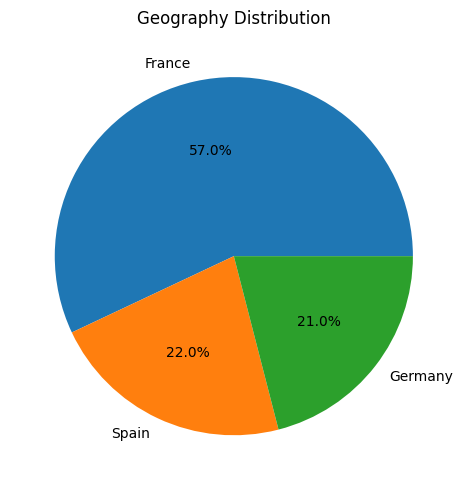

In [15]:
geography_counts = df['Geography'].value_counts()

plt.figure(figsize=(5, 5)) 
plt.pie(geography_counts.values, labels=geography_counts.index, autopct='%1.1f%%')
plt.title('Geography Distribution')

plt.tight_layout()
plt.show()

France is the dominant country in this churn problem, followed by Spain and Germany, comprising a dataset that includes customers from Europe.

#### **2. Histograms**

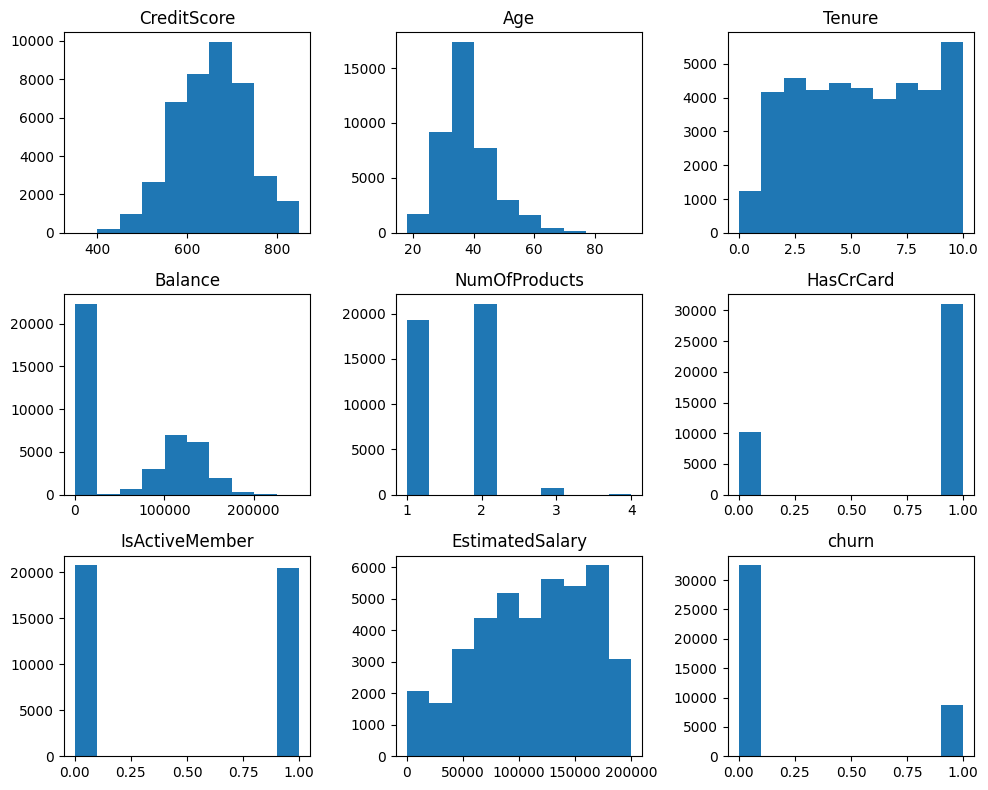

In [16]:
hist_cols = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'churn']

df[hist_cols].hist(figsize=(10, 8), grid=False)
plt.tight_layout()
plt.show()


**Insights from Histograms:**

1. CreditScore: The distribution of customers' credit scores appears normally balanced, with most scores concentrated between 600 and 700.
2. Age: The distribution is significantly left-skewed, showing that the bank has more younger customers, with a concentration in the 30-50 age range. To reduce churn, marketing programs can be targeted toward this age group to improve retention.
3. Tenure: The tenure distribution shows a relatively normal shape, but there is a noticeable peak at 10 years, indicating a potential loyalty point. Retention programs might focus on customers approaching this tenure to maintain their engagement.
4. Balance: The distribution shows a significant peak for customers with no balance. This suggests an opportunity to create programs that encourage these customers to increase their balances, improving customer engagement and long-term relationships.
5. NumOfProducts: The distribution peaks at customers who have 1 or 2 products. Offering additional product incentives to these customers could enhance cross-selling opportunities and reduce churn.
6. HasCrCard: Most customers already have a credit card. The bank could create promotions specifically for those who do not yet have one, driving product adoption in this segment.
7. IsActiveMember: The histogram does not show a clear distinction between active and inactive members, which might indicate that being an active member is not a strong determinant of churn in this dataset.
8. EstimatedSalary: The distribution is right-skewed, with most customers earning between 10,000 and 16,000. Programs could be developed to target customers in this salary range to enhance engagement and reduce churn.
9. Churn: There is a clear class imbalance, with the majority of customers not churning (represented by 0). This imbalance may cause the model to learn less effectively, as it might be biased toward predicting that customers will not churn. This requires handling through resampling techniques such as SMOTE to ensure balanced learning and better churn prediction.

### **3. Correlation plot**


Correlation Matrix:


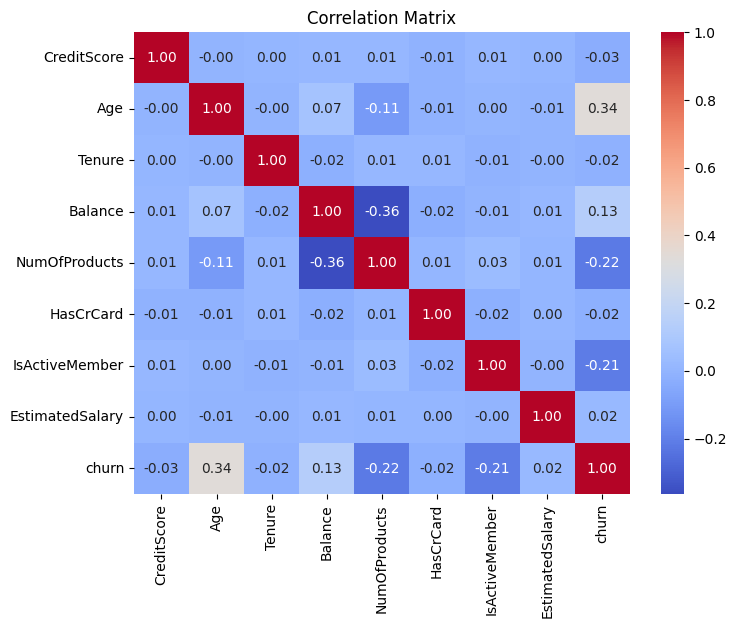

In [17]:
df2 = df.copy()
df2.drop(columns=['Geography', 'Gender'], inplace=True)
print("\nCorrelation Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [18]:
corelation = pd.DataFrame({'Correlation' : df2.corr()["churn"].sort_values(ascending=False)[1:]})
print("Correlation of independent variables with output variable:")
display(corelation)

Correlation of independent variables with output variable:


,Correlation
Age,0.34
Balance,0.13
EstimatedSalary,0.02
Tenure,-0.02
HasCrCard,-0.02
CreditScore,-0.03
IsActiveMember,-0.21
NumOfProducts,-0.22


#### **Insights from correlation plot:**

The correlation plot above shows that `Age` is the highest correlated variable with churn, followed by `balance`. 
1. Age: Age has the strongest positive correlation with churn. This suggests that as customers get older, they are more likely to churn. Older customers may be less engaged or may find the bank's services less appealing compared to younger customers.
2. Balance: Although the correlation is weak, there is a positive relationship between balance and churn. This indicates that customers with higher balances are slightly more likely to churn, possibly because they have reached financial independence or no longer require the bank's services.
3. EstimatedSalary: The correlation between estimated salary and churn is the weakest among the variables. This indicates that a customer's salary does not significantly impact their likelihood of churning.
4. Tenure: The weak negative correlation with churn suggests that customers with longer tenure are slightly more likely to remain with the bank. This indicates that retaining customers for longer periods can help reduce churn.
5. HasCrCard: The presence of a credit card shows a weak negative correlation with churn. This implies that owning a credit card has little impact on whether customers will churn, although there is a slight indication that credit card holders are less likely to leave.
6. CreditScore: The correlation between credit score and churn is also weak and negative, suggesting that credit score has minimal impact on a customer's likelihood of churning.
7. IsActiveMember: A stronger negative correlation is observed here, indicating that active members are less likely to churn. Engagement and interaction with the bank's services seem to play a critical role in retention.
8. NumOfProducts: The strongest negative correlation in the dataset, implying that the more products a customer has, the less likely they are to churn. This highlights the importance of cross-selling and encouraging customers to adopt multiple products to improve retention.

### **4. Boxplots**

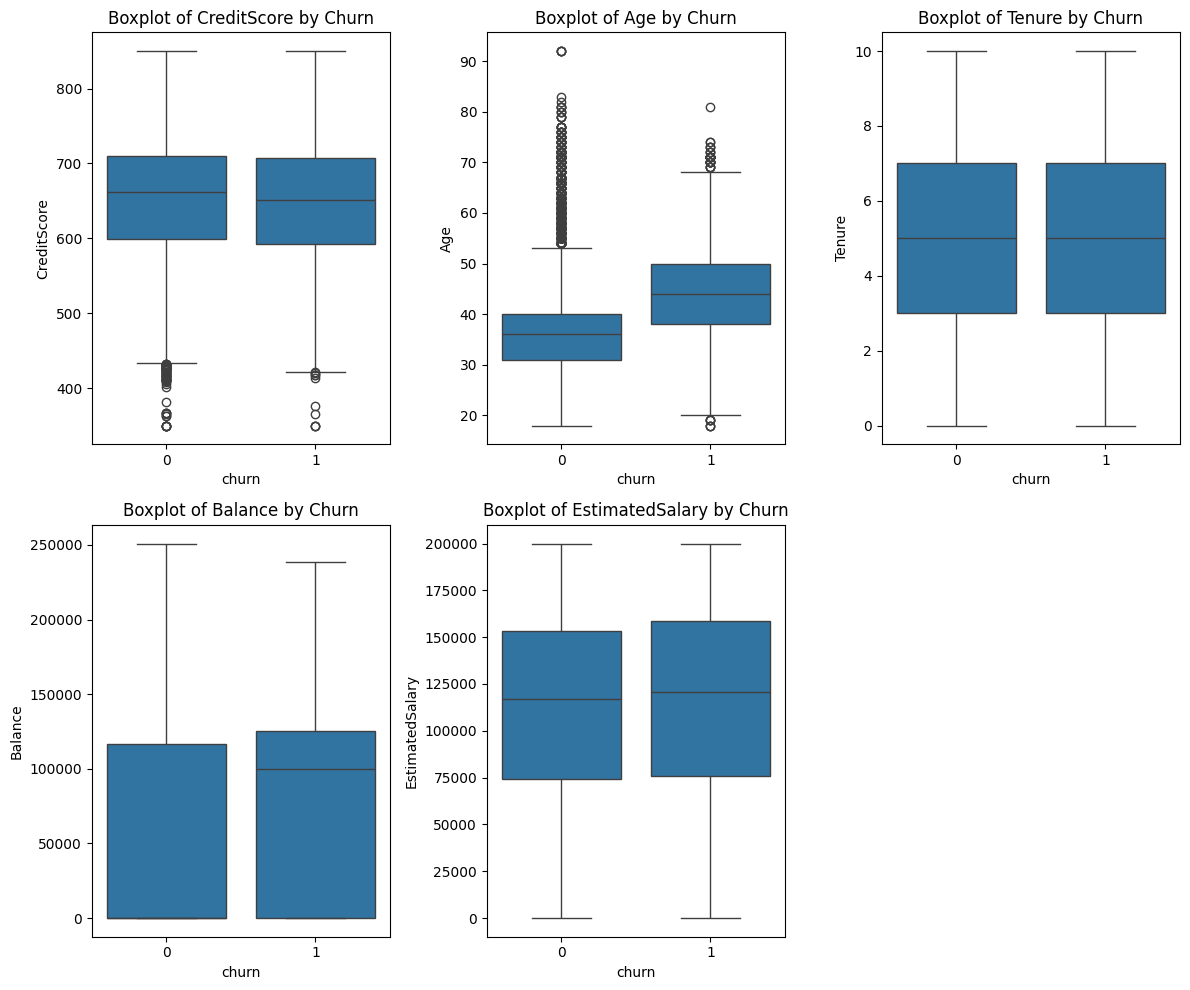

In [19]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='churn', y=col, data=df)
    plt.title(f'Boxplot of {col} by Churn')
plt.tight_layout()
plt.show()

#### **Insights from boxplot:**
1. CreditScore: both churn and non-churned customers have similar range of credit score and the median are almost the same. This feature is not a strong feature that impacts churn.
2. Age: the median of churned customers are higher and the range is larger than customers that did not churned. This shows that elder customers are more likely to churn as shown as positive correlation.
3. Tenure: does not show any significant difference between two classes indicating that tenure does not seem to strongly impact churn.
4. Balance: balance between both non churn and churn customers are similar but churned customer has slightly higher balance. 
5. EstimatedSalary: similar for both churn and non churned customer and the medians are almost the same. 

### **5. Age group and Churn**

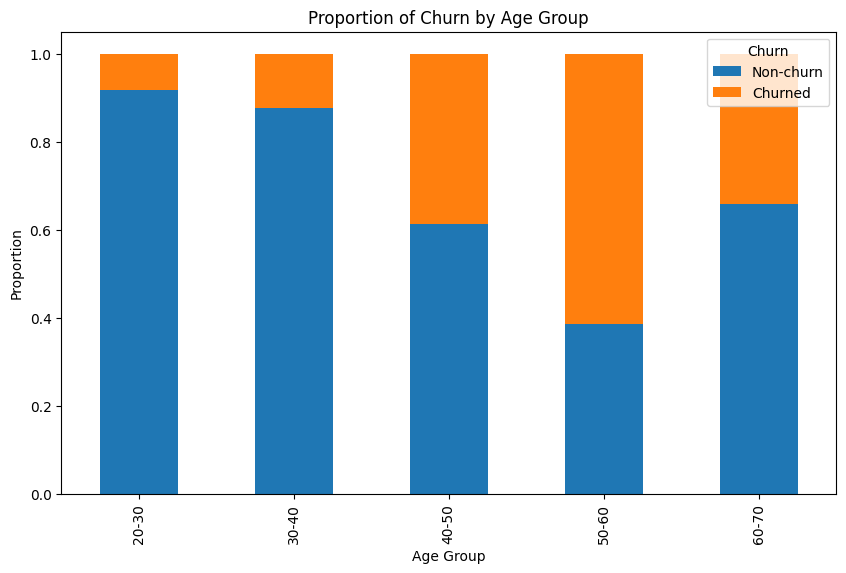

In [20]:
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
age_group_df = df.copy() 
age_group_df['Age Group'] = pd.cut(age_group_df['Age'], bins=bins, labels=labels)

age_group_analysis = age_group_df.groupby('Age Group')['churn'].value_counts(normalize=True).unstack()
age_group_analysis.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Churn by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Churn', labels=['Non-churn', 'Churned'])
plt.show()

As mentioned earlier, older customers are more likely to churn compared to younger ones. The plot above highlights that customers in the age range of 50-60 exhibit the highest churn rate compared to other age groups. This suggests that as customers age, their likelihood of churning increases, which could be due to shifting financial needs, changing preferences, or dissatisfaction with the bank's offerings for older clientele.

# **Split Data**

In [21]:
input_df = df.drop('churn', axis=1)
output_df = df['churn']

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

In [23]:
print("Shape of training set:", x_train.shape)
x_train.head()

Shape of training set: (33007, 10)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
23629,708.00,France,Female,45.00,2,0.00,1,1,0,182076.97
6996,676.00,Spain,Male,35.00,7,0.00,2,1,0,166053.92
26510,645.00,France,Female,36.00,4,133980.80,1,1,1,112333.63
40020,791.00,Spain,Male,37.00,1,0.00,2,1,0,132973.17
17668,637.00,France,Female,48.00,7,0.00,2,1,1,146573.66


In [24]:
print("Shape of testing set:", x_test.shape)
x_test.head()

Shape of testing set: (8252, 10)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
37555,680.00,Spain,Female,32.00,2,0.00,2,0,1,38614.69
4280,605.00,France,Male,32.00,3,0.00,2,1,0,138051.19
36838,826.00,Germany,Female,39.00,8,113905.48,2,0,1,174043.40
39035,697.00,Spain,Male,44.00,3,0.00,1,1,1,143357.07
22201,550.00,Germany,Female,56.00,2,103391.38,1,1,0,90878.13


### **Checking Outliers**

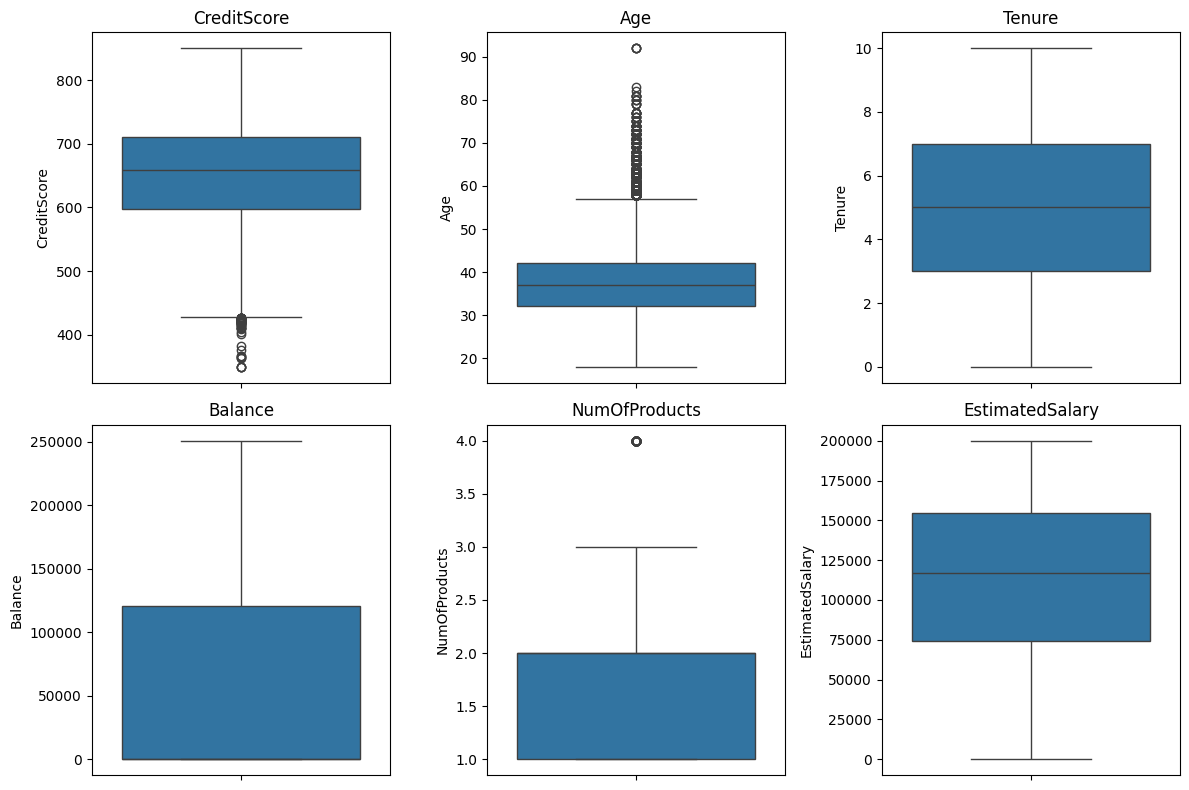

Percentage of outliers in each column:
CreditScore : 0.13%
Age : 2.99%
Tenure : 0.00%
Balance : 0.00%
NumOfProducts : 0.22%
EstimatedSalary : 0.00%


In [25]:
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=x_train[col])
    plt.title(col)
plt.tight_layout()
plt.show()

def count_outliers_iqr(df):
    outliers_count = {}
    for col in x_train[numerical_cols]:
        q1 = x_train[col].quantile(0.25)
        q3 = x_train[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers_count[col] = x_train[(x_train[col] < lower_bound) | (x_train[col] > upper_bound)][col].count()
    return outliers_count

outliers_count_iqr = count_outliers_iqr(df)
length_data = df.shape[0]

print("Percentage of outliers in each column:")
for i in x_train[numerical_cols]:
    percentage_outliers = (outliers_count_iqr[i] / length_data) * 100
    print(i, ":", f"{percentage_outliers:.2f}%")

Found outliers in `CreditScore`, `Age` and `NumOfProducts`. This will affect the selection of the type of scaler to be used.

### **Missing Value Handling**

In [26]:
df.isnull().sum()

CreditScore        8
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churn              0
dtype: int64

Missing values are found in `CreditScore`, and since it has outliers present, imputation are done with median.

In [27]:
print("Median of CreditScore :", x_train['CreditScore'].median())

Median of CreditScore : 659.0


In [28]:
x_train['CreditScore'].fillna(x_train['CreditScore'].median(), inplace = True)
x_test['CreditScore'].fillna(x_train['CreditScore'].median(), inplace = True)

In [29]:
x_train.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [30]:
x_test.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

Missing values have been imputed, no more missing values found in training and testing set

### **Feature Engineering**

#### **1. Encode `Gender` with binary encoding (manual)**

In [31]:
gender_encode = {'Gender': {'Male':1, 'Female':0}}
x_train = x_train.replace(gender_encode)
x_test = x_test.replace(gender_encode)

**Put `Gender` encode to a pickle**

In [32]:
filename = 'gender_encode.pkl'
pkl.dump(gender_encode, open(filename, 'wb'))

#### **2. Encode `Geography` using One Hot Encoder**

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
geo_encoding_train = x_train[['Geography']]
geo_encoding_test = x_test[['Geography']]

OHE = OneHotEncoder()

train_data = pd.DataFrame(OHE.fit_transform(geo_encoding_train).toarray(), columns = OHE.get_feature_names_out())
test_data = pd.DataFrame(OHE.transform(geo_encoding_test).toarray(), columns = OHE.get_feature_names_out())

x_train = x_train.reset_index()
x_test = x_test.reset_index()

x_train_enc = pd.concat([x_train, train_data], axis = 1)
x_test_enc = pd.concat([x_test, test_data], axis = 1)

In [35]:
x_train_enc.columns

Index(['index', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geography_France', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

In [36]:
x_train = x_train_enc[['CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geography_France', 'Geography_Germany',
       'Geography_Spain']]

In [37]:
x_test = x_test_enc[['CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geography_France', 'Geography_Germany',
       'Geography_Spain']]

**Put `Geography`encoding to a pickle**

In [38]:
filename = 'geography_encode.pkl'
pkl.dump(OHE, open(filename, 'wb'))

### **Scaling**

In [39]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

Our dataset consists of numeric and object data types, meaning there are heterogeneity in the data. That's why we encoded `Gender` and `Geography`.

However, from `df.describe()` above, we can see different ranges and measuring points across the columns. `CreditScore` have a range of 350-850 while `Balance` have a range of 0-250898. This can cause bias in the modeling process. Therefore, we need to perform scaling.

For columns with outliers present (`CreditScore`, `Age` and `NumOfProducts`), I will use **Robust Scaler** because it is best at scaling when outliers exist. The rest of the columns (`Tenure`, `Balance` and `EstimatedSalary`) I will use Standard Scaler. 

Columns that are binary or categorical, such as `Gender`, `Geography`, `HasCrCard` and `IsActiveMember` are not included in the scaling process.

In [40]:
robust_scaler = RobustScaler()

scale_cols = ['CreditScore', 'Age', 'NumOfProducts']

x_train[scale_cols] = robust_scaler.fit_transform(x_train[scale_cols])
x_test[scale_cols] = robust_scaler.transform(x_test[scale_cols])

In [41]:
standard_scaler = StandardScaler()

scale_cols = ['Tenure', 'Balance', 'EstimatedSalary']

x_train[scale_cols] = standard_scaler.fit_transform(x_train[scale_cols])
x_test[scale_cols] = standard_scaler.transform(x_test[scale_cols])

**Pickle both scaler**

In [42]:
filename = 'robust_scaler.pkl'
pkl.dump(robust_scaler, open(filename, 'wb'))

filename = 'standard_scaler.pkl'
pkl.dump(standard_scaler, open(filename, 'wb'))

### **Handling Class Imbalance**

In [43]:
print(df['churn'].value_counts())
print()

churn_0 = (df['churn']==0).sum()
churn_1 = (df['churn']==1).sum()
len_data = df.shape[0]

print("Percentage of churn")
print("Churn class 0 (non-churn):", f"{(churn_0/len_data)*100}%")
print("Churn class 1 (churned):", f"{(churn_1/len_data)*100}%")

churn
0    32540
1     8719
Name: count, dtype: int64

Percentage of churn
Churn class 0 (non-churn): 78.86764099953949%
Churn class 1 (churned): 21.132359000460504%


In our target variable, `churn`, it shows a clear class imbalance for customer that did not churned. This can cause bias towards the prediction of our model.

Our data shows 78.87% of customers that did not churned, or still using the bank's service, we will call it the **majority class**, while customers that churned from the bank's service as **minority class**.

In our target variable, `Personal Loan`, we observe a clear class imbalance, where the majority of customers are not granted a personal loan. This imbalance can lead to bias in our model's predictions.

Specifically, **90.4%** of the data represents customers who are not granted a personal loan (the **majority class**), while the remaining customers are those who are granted a personal loan (the **minority class**). As a result, the model might be inclined to predict all instances as "0" (no loan granted), which could lead to misleading conclusions about the model's effectiveness.

To address this imbalance, I will apply **OverSampling** using **SMOTE** (Synthetic Minority Over-sampling Technique). SMOTE generates synthetic data for the minority class, helping balance the training data. Importantly, **oversampling will be applied only to the training and validation sets**, allowing the model to learn from a balanced dataset. The testing set will remain unchanged to ensure the integrity and objectivity of the model's evaluation.

**Reference**: [5 Techniques to Handle Imbalanced Data for Classification Problems](https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/)

In [44]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)

In [45]:
print("Shape of training set before oversampling :", x_train.shape, y_train.shape)
print("Shape of training set after oversampling :", x_train_resampled.shape, y_train_resampled.shape)

Shape of training set before oversampling : (33007, 12) (33007,)
Shape of training set after oversampling : (52054, 12) (52054,)


# **Modeling**

**Exam question:**

Membuat pemodelan dengan machine learning, dimana anda diminta untuk melakukan semua proses pre-processing data yang dibutuhkan sebelum pemodelan klasifikasi. Melakukan training machine learning dengan menbandingkan 2 algoritma Random Forest dan Xgboost dan memilih algoritma terbaik yang akan anda simpan dalam format pickle. Pastikan  semua proses disertakan dalam file .ipynb termasuk classification report dari setiap model

In [46]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

In [47]:
results = pd.DataFrame(columns=['Model Name','Accuracy','Precision yes', 'Precision no', 'Recall yes', 'Recall no', 'F1-Score yes', 'F1-Score no'])
cm_results = pd.DataFrame(columns=['Model Name', 'False Positives', 'False Negatives'])

## **1. Random Forest**

In [48]:
RF = RandomForestClassifier()
RF.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier()

In [49]:
y_pred_RF = RF.predict(x_test)

In [50]:
print('\nClassification Report MODEL 1 : Random Forest\n')
print(classification_report(y_test, y_pred_RF, target_names=['1','0']))


Classification Report MODEL 1 : Random Forest

              precision    recall  f1-score   support

           1       0.90      0.90      0.90      6513
           0       0.63      0.63      0.63      1739

    accuracy                           0.84      8252
   macro avg       0.77      0.76      0.77      8252
weighted avg       0.84      0.84      0.84      8252



In [51]:
precision_yes = precision_score(y_test, y_pred_RF, pos_label=1)
recall_yes = recall_score(y_test, y_pred_RF, pos_label=1)
f1_yes = f1_score(y_test, y_pred_RF, pos_label=1)
precision_no = precision_score(y_test, y_pred_RF, pos_label=0)
recall_no = recall_score(y_test, y_pred_RF, pos_label=0)
f1_no = f1_score(y_test, y_pred_RF, pos_label=0)

model_result = ['Random Forest 1', accuracy_score(y_test, y_pred_RF), 
                precision_yes, precision_no, recall_yes, recall_no,
                f1_yes, f1_no]

results.loc[len(results)] = model_result
results

,Model Name,Accuracy,Precision yes,Precision no,Recall yes,Recall no,F1-Score yes,F1-Score no
0,Random Forest 1,0.84,0.63,0.90,0.63,0.90,0.63,0.90


### **Tuning Random Forest**

In [52]:
# param_grid = {
#     'n_estimators': [100, 200],       
#     'max_depth': [10, 15, None],      
#     'min_samples_split': [2, 5],      
# }

# RF_grid = RandomForestClassifier()

# RF_grid = GridSearchCV(RF_grid, 
#                        param_grid=param_grid, 
#                        cv=3,
#                        scoring='accuracy')

# RF_grid.fit(x_train_resampled, y_train_resampled)

In [53]:
# print("Hyperparameters to use after using GridSearchCV :")
# print(RF_grid.best_estimator_)

In [54]:
RF2 = RandomForestClassifier(n_estimators=200)
RF2.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(n_estimators=200)

In [55]:
y_pred_RF2 = RF2.predict(x_test)

In [56]:
print('\nClassification Report MODEL 1.2 : Random Forest (Tuned)\n')
print(classification_report(y_test, y_pred_RF2, target_names=['no','yes']))


Classification Report MODEL 1.2 : Random Forest (Tuned)

              precision    recall  f1-score   support

          no       0.90      0.90      0.90      6513
         yes       0.63      0.63      0.63      1739

    accuracy                           0.84      8252
   macro avg       0.76      0.77      0.76      8252
weighted avg       0.84      0.84      0.84      8252



In [57]:
precision_yes = precision_score(y_test, y_pred_RF2, pos_label=1)
recall_yes = recall_score(y_test, y_pred_RF2, pos_label=1)
f1_yes = f1_score(y_test, y_pred_RF2, pos_label=1)
precision_no = precision_score(y_test, y_pred_RF2, pos_label=0)
recall_no = recall_score(y_test, y_pred_RF2, pos_label=0)
f1_no = f1_score(y_test, y_pred_RF2, pos_label=0)

model_result = ['Random Forest 2', accuracy_score(y_test, y_pred_RF2), 
                precision_yes, precision_no, recall_yes, recall_no,
                f1_yes, f1_no]

results.loc[len(results)] = model_result
results

,Model Name,Accuracy,Precision yes,Precision no,Recall yes,Recall no,F1-Score yes,F1-Score no
0,Random Forest 1,0.84,0.63,0.90,0.63,0.90,0.63,0.90
1,Random Forest 2,0.84,0.63,0.90,0.63,0.90,0.63,0.90


## **2. XGBoost**

In [66]:
XGB = xgb.XGBClassifier()
XGB.fit(x_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [59]:
y_pred_XGB = XGB.predict(x_test)

In [60]:
print('\nClassification Report MODEL 2 : XGBoost\n')
print(classification_report(y_test, y_pred_XGB, target_names=['1','0']))


Classification Report MODEL 2 : XGBoost

              precision    recall  f1-score   support

           1       0.90      0.92      0.91      6513
           0       0.68      0.61      0.64      1739

    accuracy                           0.86      8252
   macro avg       0.79      0.77      0.78      8252
weighted avg       0.85      0.86      0.85      8252



In [61]:
precision_yes = precision_score(y_test, y_pred_XGB, pos_label=1)
recall_yes = recall_score(y_test, y_pred_XGB, pos_label=1)
f1_yes = f1_score(y_test, y_pred_XGB, pos_label=1)
precision_no = precision_score(y_test, y_pred_XGB, pos_label=0)
recall_no = recall_score(y_test, y_pred_XGB, pos_label=0)
f1_no = f1_score(y_test, y_pred_XGB, pos_label=0)

model_result = ['XGBoost 1', accuracy_score(y_test, y_pred_XGB), 
                precision_yes, precision_no, recall_yes, recall_no,
                f1_yes, f1_no]

results.loc[len(results)] = model_result
results

,Model Name,Accuracy,Precision yes,Precision no,Recall yes,Recall no,F1-Score yes,F1-Score no
0,Random Forest 1,0.84,0.63,0.90,0.63,0.90,0.63,0.90
1,Random Forest 2,0.84,0.63,0.90,0.63,0.90,0.63,0.90
2,XGBoost 1,0.86,0.68,0.90,0.61,0.92,0.64,0.91


### **Tuning XGBoost**

In [62]:
# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'n_estimators': [50, 100, 200],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0]
# }

# XGB_grid = xgb.XGBClassifier()

# XGB_grid = GridSearchCV(XGB_grid,
#                            param_grid=param_grid,
#                            scoring='accuracy',
#                            cv=5,
#                            verbose=1,  
#                            n_jobs=-1)  

# XGB_grid.fit(x_train_resampled, y_train_resampled)

In [63]:
# print("Hyperparameters to use after using GridSearchCV :")
# print(XGB_grid.best_estimator_)

In [67]:
XGB2 = xgb.XGBClassifier(learning_rate=0.2, max_depth=7, n_estimators=200)
XGB2.fit(x_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [68]:
y_pred_XGB2 = XGB2.predict(x_test)

In [69]:
print('\nClassification Report MODEL 2.1 : XGBoost (Tuned)\n')
print(classification_report(y_test, y_pred_XGB2, target_names=['no','yes']))


Classification Report MODEL 2.1 : XGBoost (Tuned)

              precision    recall  f1-score   support

          no       0.89      0.92      0.91      6513
         yes       0.67      0.59      0.63      1739

    accuracy                           0.85      8252
   macro avg       0.78      0.76      0.77      8252
weighted avg       0.85      0.85      0.85      8252



In [70]:
precision_yes = precision_score(y_test, y_pred_XGB2, pos_label=1)
recall_yes = recall_score(y_test, y_pred_XGB2, pos_label=1)
f1_yes = f1_score(y_test, y_pred_XGB2, pos_label=1)
precision_no = precision_score(y_test, y_pred_XGB2, pos_label=0)
recall_no = recall_score(y_test, y_pred_XGB2, pos_label=0)
f1_no = f1_score(y_test, y_pred_XGB2, pos_label=0)

model_result = ['XGBoost 2', accuracy_score(y_test, y_pred_XGB2), 
                precision_yes, precision_no, recall_yes, recall_no,
                f1_yes, f1_no]

results.loc[len(results)] = model_result
results

,Model Name,Accuracy,Precision yes,Precision no,Recall yes,Recall no,F1-Score yes,F1-Score no
0,Random Forest 1,0.84,0.63,0.90,0.63,0.90,0.63,0.90
1,Random Forest 2,0.84,0.63,0.90,0.63,0.90,0.63,0.90
2,XGBoost 1,0.86,0.68,0.90,0.61,0.92,0.64,0.91
3,XGBoost 2,0.85,0.67,0.89,0.59,0.92,0.63,0.91


# **Model Evaluation & Comparison**

##### **1. Random Forest 1 & 2 (After Hyperparameter Tuning)**
- **Accuracy**: Both models achieved an accuracy of 84%. While this is a decent accuracy level, relying solely on this metric can be misleading due to class imbalance in the dataset, which may bias the results toward the majority class (non-churning customers).

- **Precision**: This metric measures how well the model **avoids false positives**.
  - Yes (Churn): 63% precision indicates that the model is not highly reliable in predicting churn; it incorrectly classifies some non-churning customers as churning. This low precision suggests a potential loss of trust in churn predictions, which could lead to misguided retention strategies.
  - No (Retention): 90% precision indicates that the model is highly accurate when predicting non-churning customers, demonstrating strong performance for this class.

- **Recall**: This metric measures how well the model captures **true positives**.
  - Yes (Churn): With a recall of 63%, the model identifies only 63% of actual churn customers. This implies that a significant number of customers who are likely to churn are being missed, which can have serious consequences for the bank's ability to implement effective retention strategies.
  - No (Retention): The model effectively identifies 90% of non-churning customers, indicating robust performance for this class.

- **F1-Score**: This score represents the balance between precision and recall.
  - Yes (Churn): The F1-score of 63% indicates a need for improvement in either precision or recall to achieve a higher F1-score for this class. Enhancing this score is crucial, as it reflects the model's ability to balance the correct identification of churn and non-churn customers.
  - No (Retention): The F1-score of 90% for this class indicates a good balance between precision and recall performance, reflecting that the model performs well in predicting non-churning customers.
  
**Conclusion for Random Forest:**
Both Random Forest models demonstrate strong performance in predicting customer retention. However, they struggle significantly with accurately identifying churn customers, which is critical for the bank to develop effective retention strategies. Improving the ability to predict churn should be a primary focus to enhance customer retention efforts.

---
##### **2. XGBoost 1**
- **Accuracy**: XGBoost 1 achieved an accuracy of 86%, which is an improvement over the Random Forest models. However, similar to the previous models, accuracy alone may not provide a complete picture due to class imbalance.

- **Precision**: This metric measures how well the model **avoids false positives**.
  - Yes (Churn): 68% precision indicates that while the model is better than Random Forest at predicting churn, it still makes some mistakes by incorrectly classifying non-churned customers as churning.
  - No (Retention): 90% precision demonstrates that the model is highly reliable when predicting non-churning customers, maintaining strong performance in this area.

- **Recall**: This metric measures how well the model captures **true positives**.
  - Yes (Churn): 61% recall indicates that 61% of actual churn customers are identified correctly. While this is a slight improvement over the Random Forest models, it still suggests that many churn cases are being missed, which can impact the bank’s retention strategies.
  - No (Retention): 92% recall shows that the model effectively identifies non-churning customers, reinforcing its reliability.

- **F1-Score**: This represents the balance between precision and recall.
  - Yes (Churn): The F1-score of 64% is lower than for the churn class, suggesting there is still room for improvement.
  - No (Retention): An F1-score of 91% reflects a good balance for the retention class, indicating that the model is effective at predicting non-churn compared to the Random Forest models.
  
**Conclusion for XGBoost 1:** XGBoost 1 demonstrates improved performance in predicting churn compared to the Random Forest models, with higher precision and a good F1-score for churn predictions. However, the recall for churn remains an area for enhancement, which is crucial for the bank to retain at-risk customers effectively.

---
##### **3. XGBoost 2 (After Hyperparameter Tuning)**
- **Accuracy**: XGBoost 2 achieved an accuracy of 85%, which is slightly lower than XGBoost 1 but still an improvement over the Random Forest models. As with the others, caution should be taken in interpreting accuracy due to class imbalance.

- **Precision**: This metric measures how well the model **avoids false positives**.
  - Yes (Churn): 67% precision indicates that while the model performs better than the Random Forest models, it still misclassifies some non-churned customers as churning.
  - No (Retention): 89% precision highlights that the model is effective in predicting non-churning customers, similar to XGBoost 1.

- **Recall**: This metric measures how well the model captures **true positives**.
  - Yes (Churn): 59% recall indicates that 59% of actual churn customers are correctly identified. This performance is slightly below XGBoost 1 and still leaves many churn cases unaddressed, which is critical for retention efforts.
  - No (Retention): 91% recall demonstrates that the model effectively identifies retained customers.

- **F1-Score**: This represents the balance between precision and recall.
  - Yes (Churn): The F1-score of 92% suggests a solid balance for the churn class, indicating that it is effective at predicting churn.
  - No (Retention): The F1-score of 63% indicates a need for further improvements in this class.

**Conclusion for XGBoost 2**: XGBoost 2 exhibits improved performance in predicting churn compared to the Random Forest models, with competitive precision and a solid F1-score. However, like XGBoost 1, the recall for churn is an area needing attention to enhance the bank’s ability to retain at-risk customers.

### **Conclusion**
Among the evaluated models, XGBoost 1 demonstrates the best performance in effectively identifying the churn class, which is the minority class in this context. With the highest F1-score, it provides the bank with valuable insights for developing strategies to address customer churn. This makes XGBoost 1 the optimal choice for tackling the churn prediction problem.

In [72]:
filename = 'XGB_churn.pkl'
pkl.dump(XGB, open(filename, 'wb'))